In [2]:
import pyfits as pf
import h5py
import numpy as np
import kmeans_radec
import matplotlib.pyplot as plt
%pylab inline
import treecorr
import seaborn as sns
from kmeans_radec import KMeans, kmeans_sample

Populating the interactive namespace from numpy and matplotlib


In [64]:
random_file = h5py.File("randoms_jk.h5")
random_coord = random_file["random_jk"][:]
random_ra = random_coord[:,0]
random_dec = random_coord[:,1]
random_file.close()

In [66]:
random_ra.shape

(13767520,)

In [20]:
lens_file = h5py.File("LRG_dense_jk.h5")
mask_lens_file = h5py.File("dense_jk_mask.h5")
lens_mask = mask_lens_file["mask"][:]
mask_lens_file.close()
lens_z = lens_file["redshift"][lens_mask]
lens_ra = lens_file["RA"][lens_mask]
lens_dec = lens_file["DEC"][lens_mask]
lens_file.close()

In [156]:
def xshear(zl1,zl2,zs1,zs2, G):
    
    source_file = h5py.File("source_zb_0.4_0.9.h5")
    source_jk_mask = h5py.File("source_mask_zb_0.4_0.9.h5")
    source_mask = source_jk_mask["mask"][:]
    source_jk_mask.close()
    source_ra = source_file["ra"][source_mask]
    source_dec = source_file["dec"][source_mask]
    source_z = source_file["zb"][source_mask]
    source_e1 = source_file["e1"][source_mask]
    source_e2 = source_file["e2"][source_mask]
    source_w = source_file["w"][source_mask]
    source_size = source_file["snr"][source_mask]
    source_file.close()
    
    mask_z_lens = (lens_z>zl1)&(lens_z<zl2)
    
    if G == "G1":
        mask_z_lens = mask_z_lens&(lens_dec<-28)&(lens_ra<55)
    if G == "G2":
        mask_z_lens = mask_z_lens&(lens_dec<-28)&(lens_ra>55)
    if G == "G3":
        mask_z_lens = mask_z_lens&(lens_dec>-28)&(lens_ra<160)
    if G == "G4":
        mask_z_lens = mask_z_lens&(lens_dec>-28)&(lens_ra>160)&(lens_ra<200)
    if G == "G5":    
        mask_z_lens = mask_z_lens&(lens_dec>-28)&(lens_ra>160)&(lens_ra>200)
        
    source_z_mask = (source_z>zs1)&(source_z<zs2)
    
    if G == "G1":
        source_z_mask = source_z_mask&(source_dec<-28)&(source_ra<55)
    if G == "G2":
        source_z_mask = source_z_mask&(source_dec<-28)&(source_ra>55)
    if G == "G3":
        source_z_mask = source_z_mask&(source_dec>-28)&(source_ra<160)
    if G == "G4":
        source_z_mask= source_z_mask&(source_dec>-28)&(source_ra>160)&(source_ra<200)
    if G == "G5":    
        source_z_mask= source_z_mask&(source_dec>-28)&(source_ra>160)&(source_ra>200)    
    
    
    source_ra = source_ra[source_z_mask]
    source_dec = source_dec[source_z_mask]
    source_z = source_z[source_z_mask]
    source_e1 = source_e1[source_z_mask]
    source_e2 = source_e2[source_z_mask]
    source_w = source_w[source_z_mask]
    source_size = source_size[source_z_mask]
    
    lens_cat = treecorr.Catalog(x=lens_ra[mask_z_lens], y=lens_dec[mask_z_lens], x_units='degree', y_units='degree')
    source_cat=treecorr.Catalog(x=source_ra,y=source_dec,g1=source_e1,g2=-1.*source_e2,w=source_w,x_units='degree',y_units='degree')

    ng = treecorr.NGCorrelation(nbins = 20, min_sep=0.5, max_sep=220, sep_units='arcmin', verbose=1)
    ng.process(lens_cat, source_cat)
    r, xi_t, xi_x , weight , npairs = ng.meanr , ng.xi, ng.xi_im, ng.weight, ng.npairs   
    N = len(lens_ra[mask_z_lens])
    return r, xi_t, xi_x, weight, npairs, N  


def xshear_nn(zl1,zl2,zs1,zs2, G):
    source_file = h5py.File("source_zb_0.4_0.9.h5")
    source_jk_mask = h5py.File("source_mask_zb_0.4_0.9.h5")
    source_mask = source_jk_mask["mask"][:]
    source_jk_mask.close()
    source_ra = source_file["ra"][source_mask]
    source_dec = source_file["dec"][source_mask]
    source_z = source_file["zb"][source_mask]
    source_e1 = source_file["e1"][source_mask]
    source_e2 = source_file["e2"][source_mask]
    source_w = source_file["w"][source_mask]
    source_size = source_file["snr"][source_mask]
    source_file.close()
    
    mask_z_lens = (lens_z>zl1)&(lens_z<zl2)
    
    if G == "G1":
        mask_z_lens = mask_z_lens&(lens_dec<-28)&(lens_ra<55)
    if G == "G2":
        mask_z_lens = mask_z_lens&(lens_dec<-28)&(lens_ra>55)
    if G == "G3":
        mask_z_lens = mask_z_lens&(lens_dec>-28)&(lens_ra<160)
    if G == "G4":
        mask_z_lens = mask_z_lens&(lens_dec>-28)&(lens_ra>160)&(lens_ra<200)
    if G == "G5":    
        mask_z_lens = mask_z_lens&(lens_dec>-28)&(lens_ra>160)&(lens_ra>200)
        
    source_z_mask = (source_z>zs1)&(source_z<zs2)
    
    if G == "G1":
        source_z_mask = source_z_mask&(source_dec<-28)&(source_ra<55)
    if G == "G2":
        source_z_mask = source_z_mask&(source_dec<-28)&(source_ra>55)
    if G == "G3":
        source_z_mask = source_z_mask&(source_dec>-28)&(source_ra<160)
    if G == "G4":
        source_z_mask= source_z_mask&(source_dec>-28)&(source_ra>160)&(source_ra<200)
    if G == "G5":    
        source_z_mask= source_z_mask&(source_dec>-28)&(source_ra>160)&(source_ra>200)    
    
    
    source_ra = source_ra[source_z_mask]
    source_dec = source_dec[source_z_mask]
    source_z = source_z[source_z_mask]
    source_e1 = source_e1[source_z_mask]
    source_e2 = source_e2[source_z_mask]
    source_w = source_w[source_z_mask]
    source_size = source_size[source_z_mask]
    
    lens_cat = treecorr.Catalog(x=lens_ra[mask_z_lens], y=lens_dec[mask_z_lens], x_units='degree', y_units='degree')
    source_cat=treecorr.Catalog(x=source_ra,y=source_dec, x_units='degree',y_units='degree')

    ng = treecorr.NNCorrelation(nbins = 20, min_sep=0.5, max_sep=220, sep_units='arcmin', verbose=1)
    ng.process(lens_cat, source_cat)
    r, xi_t, xi_x , weight , npairs = ng.meanr , ng.xi, ng.xi_im, ng.weight, ng.npairs   
    N = len(lens_ra[mask_z_lens])
    return r, xi_t, xi_x, weight, npairs, N    

In [167]:
def xshear_random(zs1,zs2, G):
    
    source_file = h5py.File("source_zb_0.4_0.9.h5")
    source_jk_mask = h5py.File("source_mask_zb_0.4_0.9.h5")
    source_mask = source_jk_mask["mask"][:]
    source_jk_mask.close()
    source_ra = source_file["ra"][source_mask]
    source_dec = source_file["dec"][source_mask]
    source_z = source_file["zb"][source_mask]
    source_e1 = source_file["e1"][source_mask]
    source_e2 = source_file["e2"][source_mask]
    source_w = source_file["w"][source_mask]
    source_size = source_file["snr"][source_mask]
    source_file.close()    
    source_z_mask = (source_z>zs1)&(source_z<zs2)
    
    source_z_mask = (source_z>zs1)&(source_z<zs2)
    
    if G == "G1":
        source_z_mask = source_z_mask&(source_dec<-28)&(source_ra<55)
    if G == "G2":
        source_z_mask = source_z_mask&(source_dec<-28)&(source_ra>55)
    if G == "G3":
        source_z_mask = source_z_mask&(source_dec>-28)&(source_ra<160)
    if G == "G4":
        source_z_mask= source_z_mask&(source_dec>-28)&(source_ra>160)&(source_ra<200)
    if G == "G5":    
        source_z_mask= source_z_mask&(source_dec>-28)&(source_ra>160)&(source_ra>200)    
        
    
    
    source_ra = source_ra[source_z_mask]
    source_dec = source_dec[source_z_mask]
    source_z = source_z[source_z_mask]
    source_e1 = source_e1[source_z_mask]
    source_e2 = source_e2[source_z_mask]
    source_w = source_w[source_z_mask]
    source_size = source_size[source_z_mask]
 
    if G == "G1":
        random_mask = (random_dec<-28)&(random_ra<55)
    if G == "G2":
        random_mask = (random_dec<-28)&(random_ra>55)
    if G == "G3":
        random_mask = (random_dec>-28)&(random_ra<160)
    if G == "G4":
        random_mask = (random_dec>-28)&(random_ra>160)&(random_ra<200)
    if G == "G5":    
        random_mask = (random_dec>-28)&(random_ra>200)
    if G == "All":
        random_mask = random_dec>-50
        
    lens_cat = treecorr.Catalog(x=random_ra[random_mask], y=random_dec[random_mask], x_units='degree', y_units='degree')

    source_cat=treecorr.Catalog(x=source_ra,y=source_dec,g1=source_e1,g2=-1.*source_e2,w=source_w,x_units='degree',y_units='degree')

    ng = treecorr.NGCorrelation(nbins = 20, min_sep=0.5, max_sep=220, sep_units='arcmin', verbose=1)
    ng.process(lens_cat, source_cat)
    r, xi_t, xi_x , weight , npairs = ng.meanr , ng.xi, ng.xi_im, ng.weight, ng.npairs   
    N = len(random_ra[random_mask])
    return r, xi_t, xi_x, weight, npairs, N  

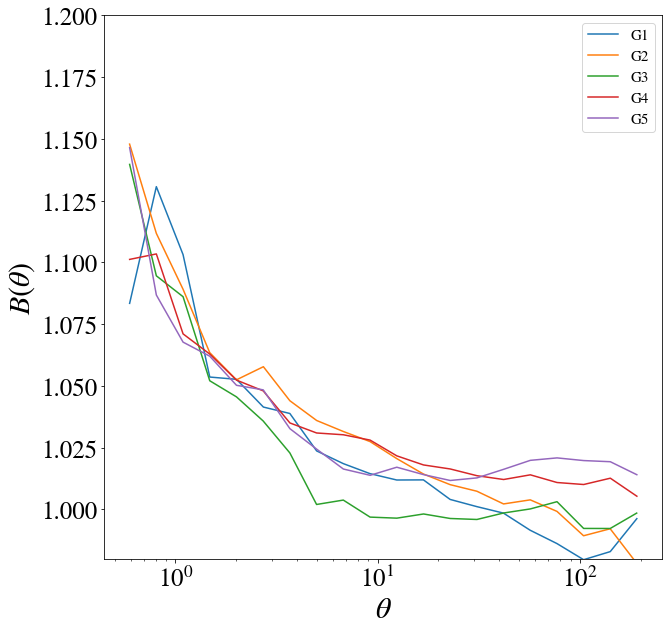

In [173]:
GG = ["G1","G2","G3","G4","G5"]
plt.figure(figsize = (10,10))
for G in GG:
    r, xi_t, xi_x, weight, npairs, N = xshear_random(0.8,0.9, G)
    rl, xi_tl, xi_xl , weightl , npairsl, Nl = xshear(0.5,0.7,0.8,0.9, G)
    plt.semilogx(r, weightl*N/weight/Nl, label = G)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.ylabel(r'$B(\theta)$' , fontsize = 30)
plt.xlabel(r'$\theta$' , fontsize = 30)
plt.legend(fontsize = 15)
plt.ylim([0.98 , 1.2])
plt.show()    

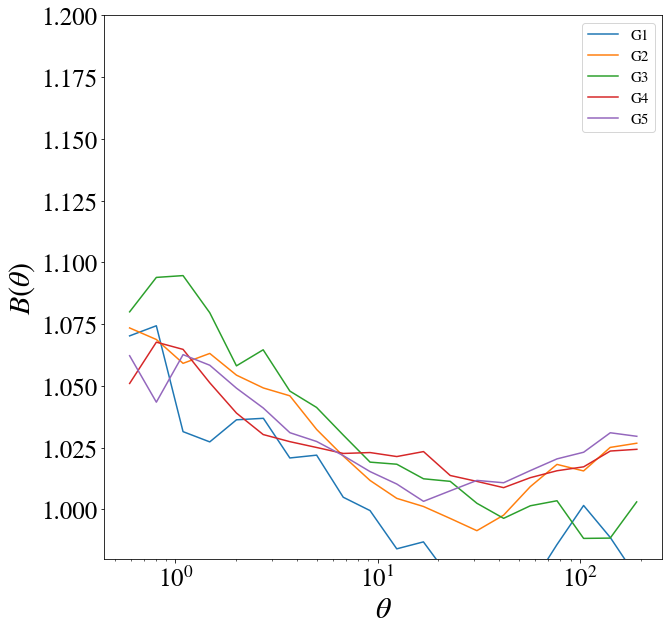

In [174]:
GG = ["G1","G2","G3","G4","G5"]
plt.figure(figsize = (10,10))
for G in GG:
    r, xi_t, xi_x, weight, npairs, N = xshear_random(0.4,0.9, G)
    rl, xi_tl, xi_xl , weightl , npairsl, Nl = xshear(0.1,0.3,0.4,0.9, G)
    plt.semilogx(r, weightl*N/weight/Nl, label = G)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.ylabel(r'$B(\theta)$' , fontsize = 30)
plt.xlabel(r'$\theta$' , fontsize = 30)
plt.legend(fontsize = 15)
plt.ylim([0.98 , 1.2])
plt.show()   

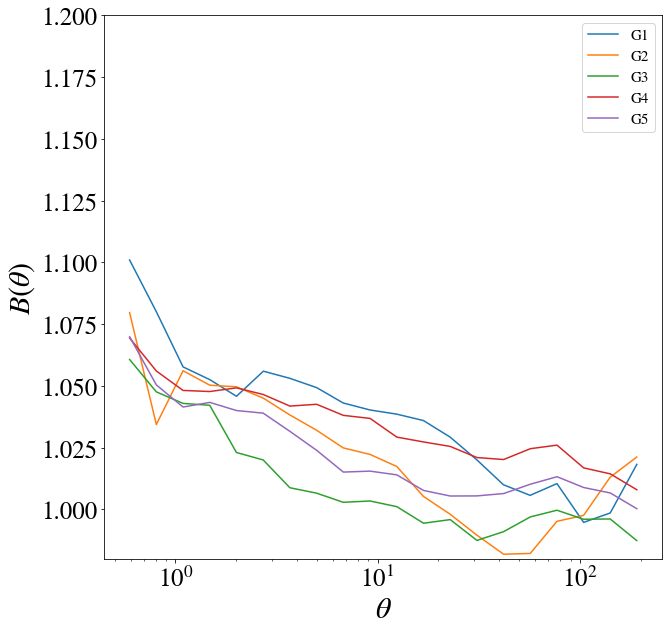

In [175]:
GG = ["G1","G2","G3","G4","G5"]
plt.figure(figsize = (10,10))
for G in GG:
    r, xi_t, xi_x, weight, npairs, N = xshear_random(0.6,0.9, G)
    rl, xi_tl, xi_xl , weightl , npairsl, Nl = xshear(0.3,0.5,0.6,0.9, G)
    plt.semilogx(r, weightl*N/weight/Nl, label = G)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.ylabel(r'$B(\theta)$' , fontsize = 30)
plt.xlabel(r'$\theta$' , fontsize = 30)
plt.ylim([0.98 , 1.2])
plt.legend(fontsize = 15)
plt.show()   